# Rain in Australia - Post EDA
[https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [5]:
weatherAUS = pd.read_csv('weatherAUS.csv')

In [6]:
len(weatherAUS)

145460

In [7]:
def combine_values(df, column1, column2, verbose=False):
    result = pd.Series(index=df.index)

    for i, row in df.iterrows():
        if pd.isna(row[column1]) and pd.isna(row[column2]):
            result[i] = np.nan
        elif pd.isna(row[column1]):
            result[i] = row[column2]
        elif pd.isna(row[column2]):
            result[i] = row[column1]
        else:
            result[i] = (row[column1] + row[column2]) / 2
    if verbose:
        # Afficher le nombre de NaN dans les colonnes d'entrée et la colonne de sortie
        num_nan_input1 = df[column1].isna().sum()
        num_nan_input2 = df[column2].isna().sum()
        num_nan_output = result.isna().sum()
        print(f"NaN dans {column1}: {num_nan_input1}")
        print(f"NaN dans {column2}: {num_nan_input2}")
        print(f"NaN dans la colonne de sortie: {num_nan_output}")

    return result

In [8]:
def display_nan_proportion(dataframe: pd.DataFrame, dataframe_name: str = "le dataframe"):
    nan_proportions = (dataframe.isna().sum() / len(dataframe)) * 100
    nan_proportions = nan_proportions.sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=nan_proportions.values, y=nan_proportions.index, hue=nan_proportions.index, palette='viridis', legend=False)
    plt.xlabel('Proportion de NaN (%)')
    plt.title(f'Proportions de NaN par colonne dans {dataframe_name}')
    plt.gca().invert_yaxis()  # La colonne avec le plus de NaN en bas
    plt.show()

In [9]:
weatherAUS['Temp'] = combine_values(weatherAUS, column1='Temp9am', column2='Temp3pm', verbose=True)
weatherAUS['Humidity'] = combine_values(weatherAUS, column1='Humidity9am', column2='Humidity3pm', verbose=True)
weatherAUS['WindSpeed'] = combine_values(weatherAUS, column1='WindSpeed9am', column2='WindSpeed3pm', verbose=True)
weatherAUS['Pressure'] = combine_values(weatherAUS, column1='Pressure9am', column2='Pressure3pm', verbose=True)

NaN dans Temp9am: 1767
NaN dans Temp3pm: 3609
NaN dans la colonne de sortie: 1129
NaN dans Humidity9am: 2654
NaN dans Humidity3pm: 4507
NaN dans la colonne de sortie: 1887
NaN dans WindSpeed9am: 1767
NaN dans WindSpeed3pm: 3062
NaN dans la colonne de sortie: 1213
NaN dans Pressure9am: 15065
NaN dans Pressure3pm: 15028
NaN dans la colonne de sortie: 14804


In [10]:
weatherAUS['Date'] = pd.to_datetime(weatherAUS['Date'])
weatherAUS['Month'] = weatherAUS['Date'].dt.month
weatherAUS['Year'] = weatherAUS['Date'].dt.year

In [11]:
columns_to_keep = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity', 'WindSpeed', 'Pressure', 'Month', 'Temp', 'RainToday', 'Year', 'RainTomorrow']

weatherAUS = weatherAUS[columns_to_keep]


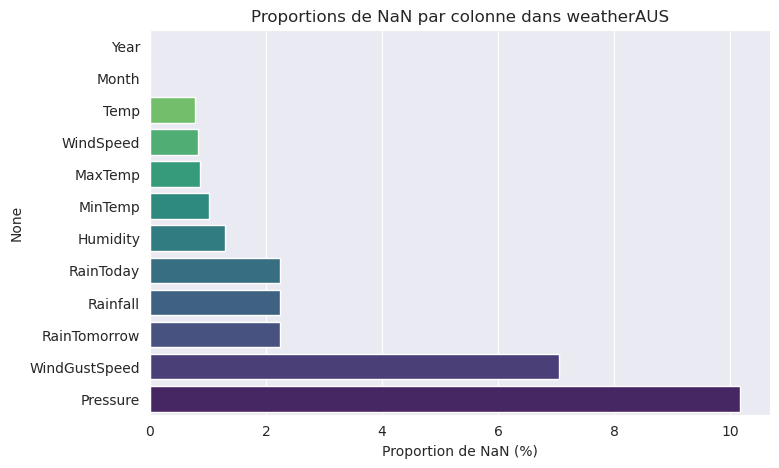

In [12]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [13]:
weatherAUS.dropna(inplace=True)

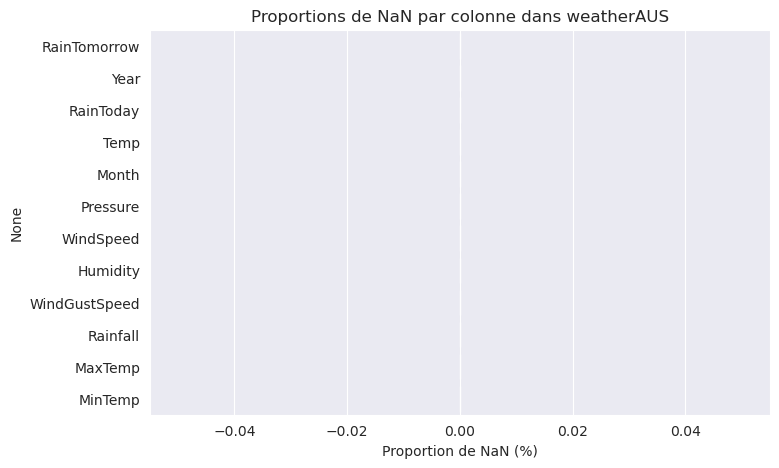

In [14]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [15]:
len(weatherAUS)

120960

In [16]:
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'Yes': True, 'No': False})
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'Yes': True, 'No': False})

In [17]:
weatherAUS

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity,WindSpeed,Pressure,Month,Temp,RainToday,Year,RainTomorrow
0,13.4,22.9,0.6,44.0,46.5,22.0,1007.40,12,19.35,False,2008,False
1,7.4,25.1,0.0,44.0,34.5,13.0,1009.20,12,20.75,False,2008,False
2,12.9,25.7,0.0,46.0,34.0,22.5,1008.15,12,22.10,False,2008,False
3,9.2,28.0,0.0,24.0,30.5,10.0,1015.20,12,22.30,False,2008,False
4,17.5,32.3,1.0,41.0,57.5,13.5,1008.40,12,23.75,False,2008,False
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,43.0,14.0,1022.95,6,15.15,False,2017,False
145455,2.8,23.4,0.0,31.0,37.5,12.0,1022.45,6,16.25,False,2017,False
145456,3.6,25.3,0.0,22.0,38.5,11.0,1021.30,6,17.70,False,2017,False
145457,5.4,26.9,0.0,37.0,38.5,9.0,1018.90,6,19.30,False,2017,False


In [18]:
X = weatherAUS.drop(['RainTomorrow'], axis=1)
y = weatherAUS['RainTomorrow']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
categorical_features = ['RainToday', 'Month', 'Year']
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity', 'WindSpeed', 'Pressure', 'Temp']

In [21]:
# Création d'un pipeline pour traiter les caractéristiques
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [22]:
# Création du pipeline avec un classificateur SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

In [23]:
# Définition de la grille de recherche des hyperparamètres
param_grid = [
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
    },
    {
        'classifier': [LinearSVC()],
        'classifier__C': [0.1, 1, 10, 100],
    }
]


In [24]:
from sklearn.metrics import make_scorer, roc_auc_score
# Définition de la métrique d'évaluation comme ROC AUC
scoring = {'ROC AUC': make_scorer(roc_auc_score)}

In [25]:
# Recherche sur la grille des hyperparamètres avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, scoring=scoring, refit='ROC AUC')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print("Meilleur score ROC AUC :")
print(grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time= 2.9min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time= 2.9min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time= 2.9min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time= 2.9min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time= 2.9min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time= 3.7min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time= 3.6min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time= 3.7min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time= 3.7min
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time= 3.4min
[CV] END classifier=SVC(), classif

/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   7.1s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   7.1s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   7.1s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   7.1s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   7.0s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   7.6s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   7.6s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   7.6s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   7.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   7.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   8.8s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   8.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   8.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   8.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   8.6s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   9.2s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   9.2s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   9.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   9.2s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   9.3s
Meilleurs paramètres trouvés :
{'classifier': SVC(), 'classifier__C': 100, 'classifier__kernel': 'rbf'}
Meilleur score ROC AUC :
0.715438932092475


In [26]:
grid_search.best_score_

0.715438932092475

In [27]:
y_pred = grid_search.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

       False       0.87      0.95      0.91     18828
        True       0.73      0.49      0.58      5364

    accuracy                           0.85     24192
   macro avg       0.80      0.72      0.74     24192
weighted avg       0.84      0.85      0.83     24192


In [30]:
ratio = weatherAUS['RainTomorrow'].value_counts(normalize=True)
print(ratio)

RainTomorrow
False    0.781068
True     0.218932
Name: proportion, dtype: float64


# Rééquilibrage du dataset déséquilibré

In [31]:
# Divisez les données en deux ensembles distincts pour chaque classe
data_false = weatherAUS[weatherAUS['RainTomorrow'] == False]
data_true = weatherAUS[weatherAUS['RainTomorrow'] == True]

# Sous-échantillonnez la classe majoritaire (False)
data_false_downsampled = data_false.sample(n=len(data_true), random_state=42)

# Concaténez les ensembles de données sous-échantillonnés
weatherAUS_balanced = pd.concat([data_false_downsampled, data_true])

# Mélangez les données pour garantir un ordre aléatoire
weatherAUS_balanced = weatherAUS_balanced.sample(frac=1, random_state=42)


In [32]:
len(weatherAUS_balanced)

52964

In [33]:
X = weatherAUS_balanced.drop(['RainTomorrow'], axis=1)
y = weatherAUS_balanced['RainTomorrow']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
categorical_features = ['RainToday', 'Month', 'Year']
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity', 'WindSpeed', 'Pressure', 'Temp']

In [36]:
# Création d'un pipeline pour traiter les caractéristiques
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Création du pipeline avec un classificateur SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

In [38]:
# Définition de la grille de recherche des hyperparamètres
param_grid = [
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
    },
    {
        'classifier': [LinearSVC()],
        'classifier__C': [0.1, 1, 10, 100],
    }
]


In [39]:
from sklearn.metrics import make_scorer, roc_auc_score
# Définition de la métrique d'évaluation comme ROC AUC
scoring = {'ROC AUC': make_scorer(roc_auc_score)}

In [40]:
# Recherche sur la grille des hyperparamètres avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, scoring=scoring, refit='ROC AUC')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print("Meilleur score ROC AUC :")
print(grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time=  39.9s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time=  40.9s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time=  38.0s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time=  38.2s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=linear; total time=  38.2s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time=  49.1s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time=  49.1s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time=  49.1s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time=  49.2s
[CV] END classifier=SVC(), classifier__C=0.1, classifier__kernel=rbf; total time=  49.4s
[CV] END classifier=SVC(), classif

/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   0.9s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   0.8s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   0.8s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   0.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=0.1; total time=   1.4s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   2.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   2.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   2.4s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   2.2s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ............classifier=LinearSVC(), classifier__C=1; total time=   2.4s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   2.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   2.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   2.4s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   2.4s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ...........classifier=LinearSVC(), classifier__C=10; total time=   2.5s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   2.7s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   2.5s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   2.5s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   2.3s


/home/wm18vw/Documents/EnvironnementsDevPython/miniconda3/envs/ML-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..........classifier=LinearSVC(), classifier__C=100; total time=   2.3s
Meilleurs paramètres trouvés :
{'classifier': SVC(), 'classifier__C': 10, 'classifier__kernel': 'rbf'}
Meilleur score ROC AUC :
0.788307532891904


In [41]:
grid_search.best_score_

0.788307532891904

In [42]:
y_pred = grid_search.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

       False       0.78      0.80      0.79      5269
        True       0.80      0.78      0.79      5324

    accuracy                           0.79     10593
   macro avg       0.79      0.79      0.79     10593
weighted avg       0.79      0.79      0.79     10593
